# Assignment 1: Gradient Descent

## Given

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
def func(x):
    ''' The function to do gradient descent on. '''
    return (x-1)**2*(x-2)*(x+1)

def plot_gradient_descent(f,gx, annotate):
    ''' Plots the function f an the path that is traversed during gradient descent
    Args:
        f: The function
        gx: An array of all x values [x_init, x1, x2, ... xNumSteps]
        annotate: A boolean to enable / disable annotations
    '''
    if gx.max() > 3.0 or gx.min() < -1.5:
        print('Some x values are out of plotting range! They are clipped to (-1.5, 3.0) in the plot.')
        gx = np.clip(gx, -1.5, 3.0)
    x = np.linspace(-1,2.5,200)
    plt.figure(figsize=(11,4))
    plt.axis([-1.2, 2.7, -3.2, 4.2])
    plt.plot(x, f(x),'b-',label='f(x)')
    plt.plot(gx, f(gx),'ro--',label='iterations')
    plt.grid(True)
    plt.title('Gradient Descent Steps', fontsize=14)
    plt.legend(loc='upper left', fontsize=14)
    if annotate:
        for i, xy in enumerate(zip(gx, f(gx)+0.4)):
            plt.annotate('%s' % i, xy=xy, textcoords='data', color='r')

## Exercise 1: Basic Gradient Descent (7 points)

### 1. Implement numerical derivative (2 points)
First start by creating a function that computes the numerical derivative of a given one dimensional python function using central differences.

Implement the difference quotient
$$ \frac{\partial f}{\partial x}  = \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}.$$
Use $\epsilon=1e-6$. $f$ is given by `func()`.

In [10]:
def derivative(f, x, eps = 1e-6):
    '''
    Computes the numerical derivative of f at x using central differences

    Arguments:
    f --  A callable python one dimensional function.
    x -- A float

    Returns:
    grad - A float
    '''
    
    return (f(x+eps) - f(x-eps)) / (2*eps)

In [ ]:
derivative(func,0.0)

**Expected Output**:

`3.000000000086267`

### 2. Implement gradient descent (3 points)
Build a function that performs gradient descent for 20 steps on function $f$ at starting position $x_{init}$.\
 **Mathematical Expression**:

$$ x_i = x_{i-1} - \eta\cdot g $$

In [11]:
def gradient_descent(f, init_x, learning_rate, num_steps= 20, annotate=False):
    '''
    Performs gradient descent and plots the results
    
    Arguments:
    f --  A callable python one dimensionalfunction.
    init_x -- A scalar, starting point for gradient descent.
    learning_rate -- A scalar, parameter of gradient descent (eta).
    num_steps -- An int, number of update steps.
    annotate -- A bool, switches annotations in the plot on or off.
    
    Return:
    x -- A scalar, result of the gradient descent
    '''

    xs = [init_x] #  list for the intermediate results (used for plotting)
    x = init_x
    for i in range(num_steps):
        gradient = derivative(f,x)
        x -= learning_rate*gradient
        xs.append(x)

    plot_gradient_descent(f, np.array(xs), annotate)
    return x

### 3. Investigate the behavior (2 points)
Try your program with different learning rates (`0.01` , `0.05` , `0.2` , `0.25` , `0.4`) and starting points (`0.0` , `1.0`, `1.5`, `2.2`).
Do we always reach the global minimum? Explain the behavior you observe.


-0.7113420974488656

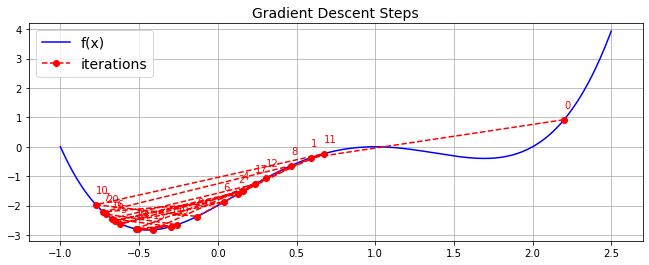

In [16]:
gradient_descent(func, 2.2, 0.25, annotate=True)

1.4952700544092465

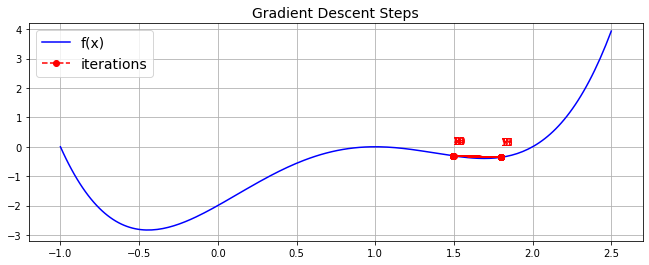

In [15]:
gradient_descent(func, 1.5, 0.4, annotate=True)

1.6162447026942237

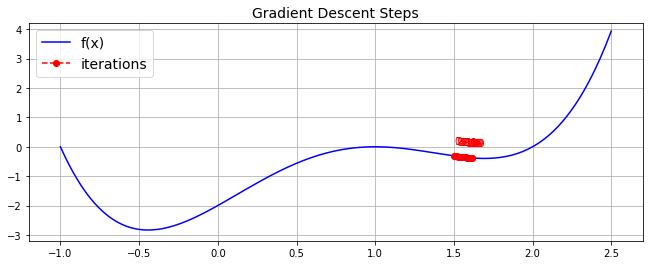

In [14]:
gradient_descent(func, 1.5, 0.01, annotate=True)

0.9999501658528224

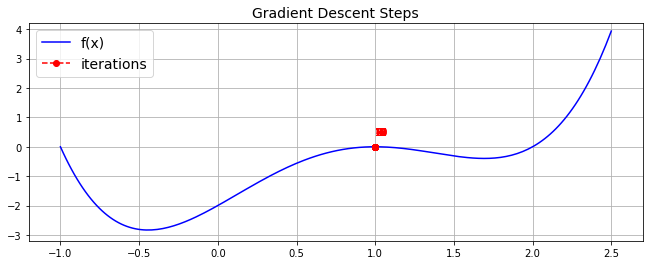

In [13]:
gradient_descent(func, 1.0, 0.4, annotate=True)

0.26599580981584436

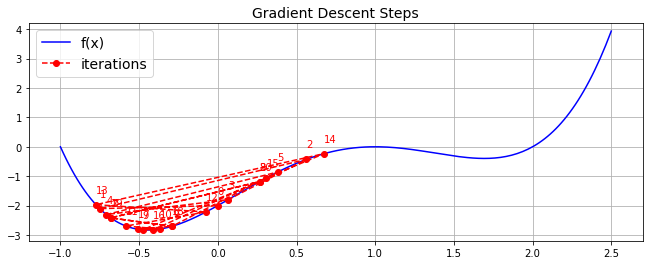

In [12]:
gradient_descent(func, 0.0, 0.25, annotate=True)

-0.3819755817480175

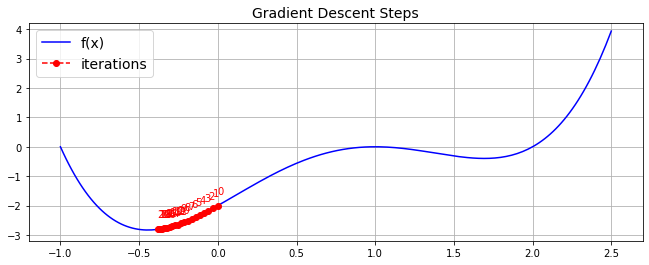

In [7]:
gradient_descent(func, 0.0, 0.01, annotate=True)

## Exercise 2: Momentum Optimizer (3 points)

### 1. Implement momentum optimizer (2 points)
To improve the performance of gradient descent we will introduce a momentum term.
The momentum $m$ is a moving average of update $\eta \cdot g$. \
 **Mathematical Expression**:

$$ m_i = \gamma \cdot m_{i-1} +\eta \cdot g $$
$$ x_i = x_{i-1} - m_i $$

In [17]:
def momentum_descent(f, init_x, learning_rate, gamma = 0.9, num_steps=20, annotate = True):
    '''
    Performs gradient descent with momentum and plots the results
    
    Arguments:
    f --  A callable python function with one dimensional output.
    init_x -- A scalar, starting point for gradient descent.
    learning_rate -- A scalar, parameter of gradient descent (eta).
    gamma -- A scalar, parameter of momentum descent.
    num_steps -- An int, number of update steps.
    annotate -- A bool, switches annotations in the plot on or off.
    
    Return:
    x -- A scalar, result of the gradient descent
    '''
          
    xs = [init_x] #  list for the intermediate results (used for plotting)
    x = init_x
    m = 0
    for i in range(num_steps):
        gradient = derivative(f,x)
        m = gamma*m + learning_rate*gradient
        x -= m
        xs.append(x)

    plot_gradient_descent(f, np.array(xs), annotate)
    return x

### 2. Investigate the behavior (1 point)
Again, study the behaviour of your program with different learning rates and starting points.
Does this work better than plain gradient descent? Describe how the momentum helps convergence.

1.677167351161568

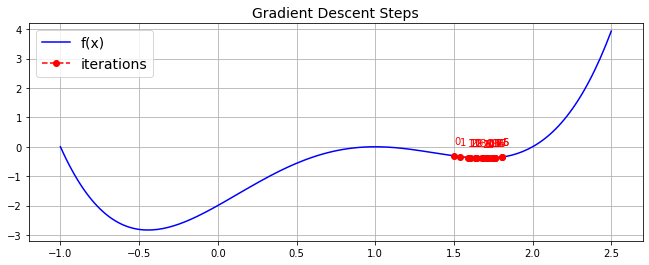

In [20]:
momentum_descent(func, 1.5, 0.05)

-0.4915612169791462

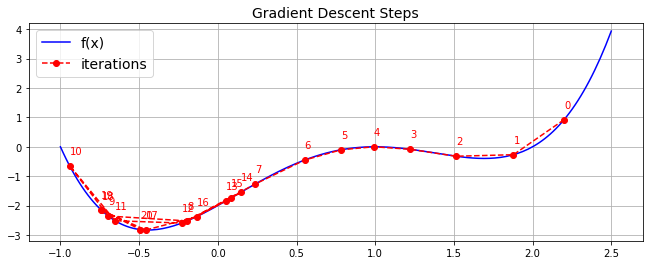

In [19]:
momentum_descent(func, 2.2, 0.05)

-0.5451775137312301

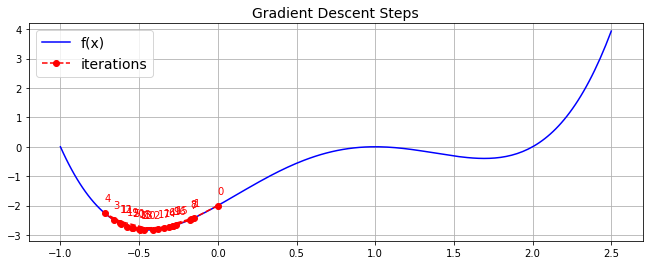

In [18]:
momentum_descent(func, 0.0, 0.05)